In [1]:
# ✅ 한글 폰트 설치 (NanumGothic)
!apt-get update -qq
!apt-get install -y fonts-nanum

# ✅ matplotlib 폰트 캐시 삭제
import os
os.system('rm -rf ~/.cache/matplotlib')

print("✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+.) 을 꼭 해주세요.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,492 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os


# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# Convolutional Layer
# 합성곱을 수행하는 레이어
# Convolutionla Layer 를 사용하는 신경망을 CNN이라고 부른다.
# 커널에 설정되어 있는 가중치 값에 따라서 특정 부분의 값을 낮추고 특정 부분의 값을 키워서
# 특성이 잘 드러나게 하는 역할을 수행한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling
# Convolutional Layer를 통과한 데이터에서 큰 부분만 취하는 역할을 수행한다.
# 필요한 특성을 나타내는 부분을 취하고 나머지는 버리는 효과를 얻게 된다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# 다차원의 데이터를 1차원 데이터로 변환시켜준다.
# 선형회귀 레이어로 가기전에 두어야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 데이터 하나가 들어오면 레이어의 모든 노드가 그 데이터를 학습하게 된다.
# 그렇기 때문에 모든 가중치 값이 데이터에 영향을 받아서 변경된다.
# 만약 각 노드들이 특정 패턴의 데이터만 학습하고자 한다면 학습시 일부 노드들을 비활성화 시켜서
# 학습에 참여시키지 않게 할 수 있다.
# 전체 데이터에 대해 모든 노드들이 과접합을 되는 것을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 통해 단어 벡터를 생성하는 레이어
# 생성한 벡터 공간의 차원을 매개변수로 받는다.
# 주어진 문장 데이터의 단어 개수가 공간의 차원을 넘어서면 출현 빈도수가 높은 단어들로만
# 구성하여 공간 벡터를 구성한다.
from tensorflow.keras.layers import Embedding
# LSTM : RNN 용 Layer
# 이전에 입력된 데이터와 함께 묶어서 학습할 데이터를 생성하는 방식으로 동작하는 레이어
# 순환신경망. 문장 데이터, 주식시세, 시계열 데이터 등의 데이터 패턴을 보고 다음 데이터를
# 예측하는데 사용한다.
# LSTM은 Long Term Memory와 Short Term Memory를 두어 데이터의 패턴이 좀더 다양하게 생성될 수
# 있도록 하는 특징을 가지고 있다.
from tensorflow.keras.layers import LSTM

# GAN
# GAN에서 사용하는 활성화 함수
from tensorflow.keras.layers import LeakyReLU
# 레이어를 통과한 데이터를 다시 표준화하여 학습 효율성을 높히게 한다.
from tensorflow.keras.layers import BatchNormalization
# 레이어를 통과한 데이터의 차원을 변경하기위 사용한다.
from tensorflow.keras.layers import Reshape
# 데이터 업샘플링 - Convolutional Layer가 데이터의 크기를 줄이므로 늘리는 것이 필요하다
from tensorflow.keras.layers import UpSampling2D
# 입력층
from tensorflow.keras.layers import Input
# 딥러닝 모델, GAN은 생성자 신경망과 판별자 신경망을 같이 써야 하기 때문에
# 이 둘을 하나의 신경망으로 합치기 위해 사용한다.
from tensorflow.keras.models import Model


# 다중 분류를 위한 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델 복원
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단
from tensorflow.keras.callbacks import EarlyStopping

# 경사하강법
from tensorflow.keras.optimizers import Adam

# 문자열을 잘라낸다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터 수를 동일하게 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어 사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전이 학습을 위한 사전 학습 모델
from tensorflow.keras.applications import VGG16

# 이미지 데이터를 불러올 때 나눠서 읽어오거나 읽어올때 이미지 데이터를 가공하면서
# 가져울 수 있는 도구
# 이미지가 들어있는 폴더이름이 결과데이터가 됨(그렇기때문에 폴더를 잘 구성해주어야 함)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.applications import ResNet152

# 출력한 것을 청소하는 함수
from IPython.display import clear_output
# 시간 관련
import time

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [18]:
charge_train = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/train/2018_train_청구입금정보.parquet')
charge_test = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/test/2018_test_청구입금정보.parquet')

#세그먼트 가져오기
segment_train = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/train/2018_train_회원정보.parquet')
segment_test = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/test/2018_test_회원정보.parquet')

charge = pd.concat([charge_train, charge_test])
charge.reset_index(inplace=True, drop=True)

segment = pd.concat([segment_train, segment_test])
segment.reset_index(inplace=True, drop=True)

# 예: '고객ID'가 공통 key일 경우
df1 = charge.merge(
    segment[["ID", "기준년월", "Segment"]],
    on=["ID", "기준년월"],
    how="left"
)
df1

,기준년월,ID,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,201807,TRAIN_000000,27,자동이체,미확인,당사페이앱+이메일,문자메세지,1,1,1,...,5,3,0,0,1,0,3,0,0,D
1,201807,TRAIN_000001,13,자동이체,주거지,우편,우편,1,1,1,...,6,3,0,0,0,0,0,0,0,E
2,201807,TRAIN_000002,1,자동이체,미확인,이메일,이메일,1,1,1,...,6,3,0,0,0,0,121,0,50,C
3,201807,TRAIN_000003,5,자동이체,주거지,우편,우편,1,1,1,...,5,3,2,0,0,0,3,0,2,D
4,201807,TRAIN_000004,13,자동이체,주거지,우편,우편,0,1,1,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,201812,TEST_99995,20,자동이체,회사,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2999996,201812,TEST_99996,20,자동이체,주거지,우편,우편,1,1,1,...,5,3,3,2,0,0,149,0,49,NaN
2999997,201812,TEST_99997,15,자동이체,미확인,이메일,이메일,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2999998,201812,TEST_99998,12,자동이체,미확인,K톡명세서+이메일,K톡,1,1,1,...,1,1,7,3,0,0,0,0,0,NaN


In [19]:
# 제거할 컬럼 및 문자열 인코딩 처리
# 대표결제방법코드는 모두 '자동이체'로 동일 -> 삭제
# 대표청구서수령지구분코드, 대표청구지고객주소구분코드: 청구서수령방법에 대해 세분화한 것 -> 삭제
# 청구서발송여부_B0, 청구서발송여부_R3M, 청구서발송여부_R6M: 0,1로 구성, 청구금액이 0이면 미발송 -> 청구금액 변수와 겹치므로 삭제
df1 = df1.drop(['대표결제방법코드', '대표청구서수령지구분코드', '대표청구지고객주소구분코드', '청구서발송여부_B0',
                                          '청구서발송여부_R3M', '청구서발송여부_R6M'], axis=1)

# 문자열 인코딩
df1['할인건수_R3M'] = df1['할인건수_R3M'].map({'1회 이상': 0, '10회 이상': 1, '20회 이상': 2,'30회 이상': 3, '40회 이상': 4})
df1['할인건수_B0M'] = df1['할인건수_B0M'].map({'1회 이상': 0, '10회 이상': 1})
df1

,기준년월,ID,대표결제일,청구서수령방법,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_마일리지_건별_B0M,포인트_마일리지_건별_R3M,포인트_포인트_건별_B0M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,201807,TRAIN_000000,27,문자메세지,12226,46588,88693,0,0,1444,...,5,3,0,0,1,0,3,0,0,D
1,201807,TRAIN_000001,13,우편,5834,10530,16861,0,0,0,...,6,3,0,0,0,0,0,0,0,E
2,201807,TRAIN_000002,1,이메일,21866,85931,165221,0,0,2305,...,6,3,0,0,0,0,121,0,50,C
3,201807,TRAIN_000003,5,우편,16356,61518,127371,0,0,1452,...,5,3,2,0,0,0,3,0,2,D
4,201807,TRAIN_000004,13,우편,0,0,155,0,0,0,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,201812,TEST_99995,20,우편,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2999996,201812,TEST_99996,20,우편,359,1256,2237,0,0,0,...,5,3,3,2,0,0,149,0,49,NaN
2999997,201812,TEST_99997,15,이메일,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2999998,201812,TEST_99998,12,K톡,21273,48141,108420,0,0,0,...,1,1,7,3,0,0,0,0,0,NaN


,비0 비율(%)
청구금액_B0,77.111633
청구금액_R3M,80.057000
청구금액_R6M,85.232567
포인트_포인트_건별_B0M,10.798833
포인트_포인트_건별_R3M,11.415100
포인트_적립포인트_R12M,22.152933
포인트_적립포인트_R3M,17.660333
포인트_이용포인트_R12M,32.766900
포인트_이용포인트_R3M,21.723800
마일_적립포인트_R3M,5.037967


,비0 비율(%)
청구금액_B0,77.111633


,청구금액_B0 비0 그룹 통계
count,2.313349e+06
mean,6.562243e+03
median,3.989000e+03
std,8.364274e+03
min,6.000000e+00
max,2.100060e+05


,청구금액_B0 비0 비율(%)
Segment,
A,100.000000
B,100.000000
C,97.043655
D,95.532324
E,72.516196


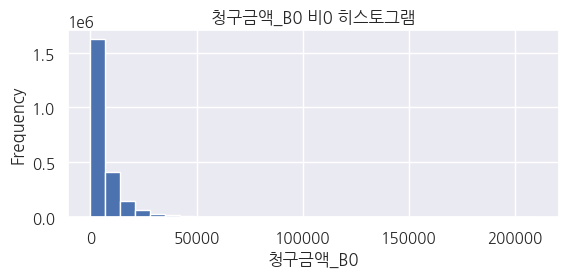

,비0 비율(%)
청구금액_R3M,80.057


,청구금액_R3M 비0 그룹 통계
count,2.401710e+06
mean,1.962872e+04
median,1.201000e+04
std,2.482705e+04
min,1.000000e+01
max,5.322610e+05


,청구금액_R3M 비0 비율(%)
Segment,
A,100.000000
B,100.000000
C,97.680069
D,96.492690
E,75.969121


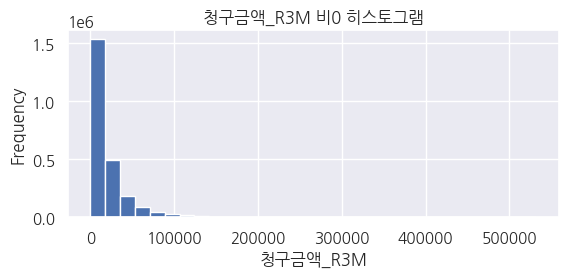

,비0 비율(%)
청구금액_R6M,85.232567


,청구금액_R6M 비0 그룹 통계
count,2.556977e+06
mean,3.867689e+04
median,2.275800e+04
std,5.082315e+04
min,1.300000e+01
max,1.112355e+06


,청구금액_R6M 비0 비율(%)
Segment,
A,100.000000
B,100.000000
C,98.618230
D,97.952423
E,82.096842


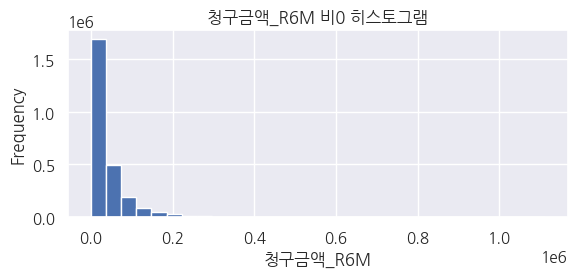

,비0 비율(%)
포인트_포인트_건별_B0M,10.798833


,포인트_포인트_건별_B0M 비0 그룹 통계
count,323965.000000
mean,2386.774445
median,2449.000000
std,1098.671439
min,-87.000000
max,7741.000000


,포인트_포인트_건별_B0M 비0 비율(%)
Segment,
A,26.646091
B,33.333333
C,18.880790
D,16.320775
E,9.275972


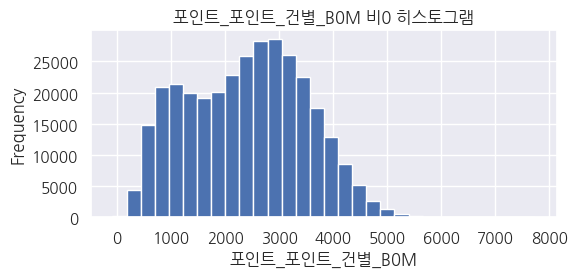

,비0 비율(%)
포인트_포인트_건별_R3M,11.4151


,포인트_포인트_건별_R3M 비0 그룹 통계
count,342453.000000
mean,6419.395984
median,6483.000000
std,3616.888485
min,-167.000000
max,24768.000000


,포인트_포인트_건별_R3M 비0 비율(%)
Segment,
A,26.851852
B,33.333333
C,19.280508
D,16.733955
E,9.946713


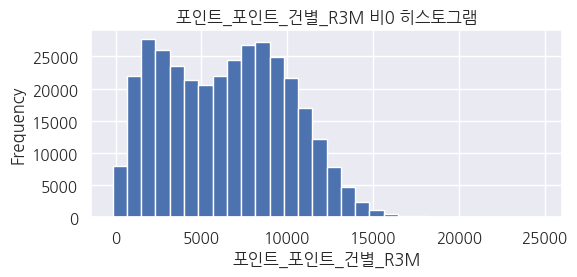

,비0 비율(%)
포인트_적립포인트_R12M,22.152933


,포인트_적립포인트_R12M 비0 그룹 통계
count,664588.000000
mean,13755.872303
median,4304.000000
std,19895.768674
min,176.000000
max,324302.000000


,포인트_적립포인트_R12M 비0 비율(%)
Segment,
A,34.259259
B,38.194444
C,34.591269
D,31.371084
E,19.698218


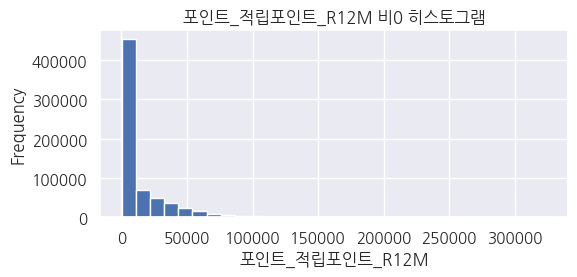

,비0 비율(%)
포인트_적립포인트_R3M,17.660333


,포인트_적립포인트_R3M 비0 그룹 통계
count,529810.00000
mean,7346.72606
median,5796.00000
std,6304.83866
min,-199.00000
max,76995.00000


,포인트_적립포인트_R3M 비0 비율(%)
Segment,
A,30.041152
B,52.777778
C,31.557332
D,28.615688
E,14.803242


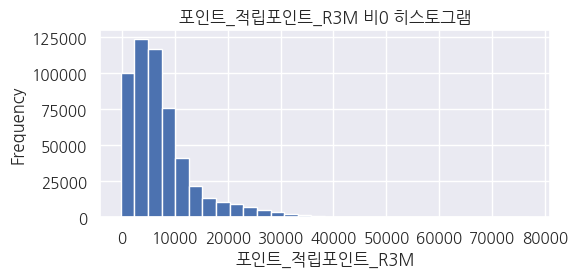

,비0 비율(%)
포인트_이용포인트_R12M,32.7669


,포인트_이용포인트_R12M 비0 그룹 통계
count,9.830070e+05
mean,3.194880e+04
median,5.128000e+03
std,8.498676e+04
min,9.500000e+01
max,1.737161e+06


,포인트_이용포인트_R12M 비0 비율(%)
Segment,
A,45.987654
B,65.972222
C,51.448389
D,47.981056
E,28.816390


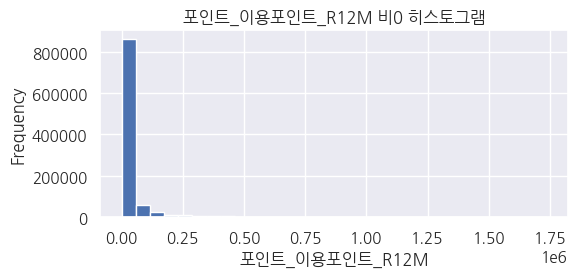

,비0 비율(%)
포인트_이용포인트_R3M,21.7238


,포인트_이용포인트_R3M 비0 그룹 통계
count,651714.000000
mean,9130.985633
median,4312.000000
std,13037.629327
min,-20.000000
max,235914.000000


,포인트_이용포인트_R3M 비0 비율(%)
Segment,
A,35.802469
B,62.500000
C,40.378556
D,36.463255
E,17.862056


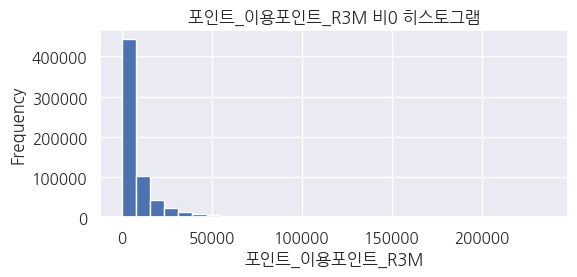

,비0 비율(%)
마일_적립포인트_R3M,5.037967


,마일_적립포인트_R3M 비0 그룹 통계
count,151139.000000
mean,2921.225885
median,2513.000000
std,1255.792995
min,545.000000
max,12352.000000


,마일_적립포인트_R3M 비0 비율(%)
Segment,
A,69.547325
B,50.000000
C,23.834156
D,11.488882
E,2.597797


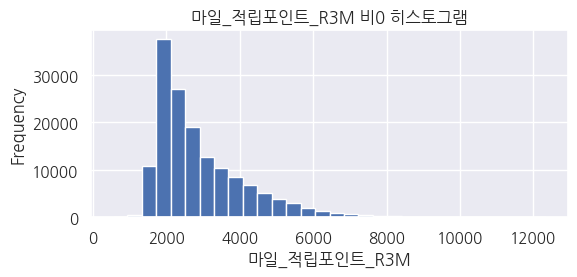

,비0 비율(%)
할인건수_R3M,10.709233


,할인건수_R3M 비0 그룹 통계
count,321277.000000
mean,1.269428
median,1.000000
std,0.510040
min,1.000000
max,4.000000


,할인건수_R3M 비0 비율(%)
Segment,
A,11.419753
B,20.833333
C,27.528803
D,26.584718
E,6.743782


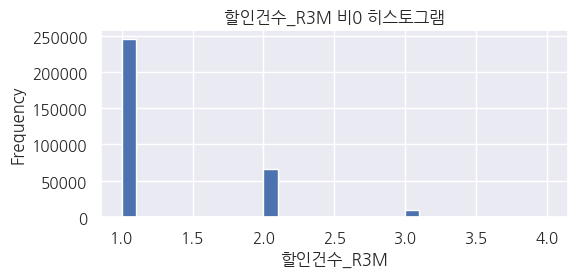

,비0 비율(%)
할인금액_R3M,28.784367


,할인금액_R3M 비0 그룹 통계
count,863531.000000
mean,279.858747
median,256.000000
std,250.557485
min,2.000000
max,1361.000000


,할인금액_R3M 비0 비율(%)
Segment,
A,29.012346
B,35.416667
C,39.644957
D,39.522165
E,26.119845


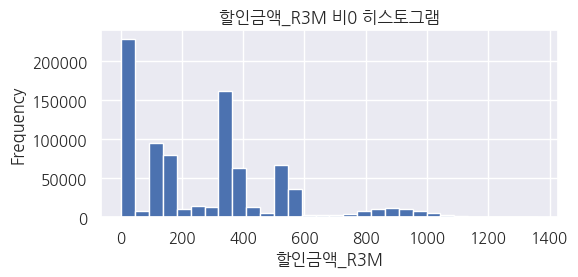

,비0 비율(%)
할인금액_B0M,24.1733


,할인금액_B0M 비0 그룹 통계
count,725199.000000
mean,105.941628
median,112.000000
std,83.069879
min,2.000000
max,480.000000


,할인금액_B0M 비0 비율(%)
Segment,
A,16.460905
B,29.861111
C,32.533114
D,33.240847
E,21.969229


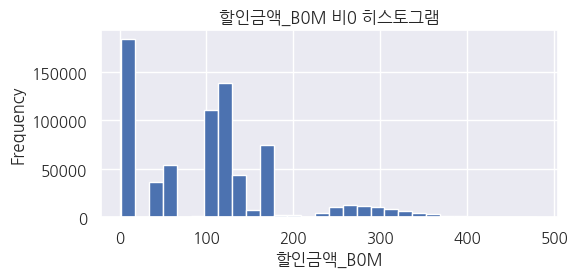

,비0 비율(%)
할인금액_청구서_R3M,36.1295


,할인금액_청구서_R3M 비0 그룹 통계
count,1.083885e+06
mean,3.341145e+02
median,2.890000e+02
std,3.060279e+02
min,2.000000e+00
max,1.976000e+03


,할인금액_청구서_R3M 비0 비율(%)
Segment,
A,33.333333
B,45.833333
C,48.759307
D,48.681716
E,33.040677


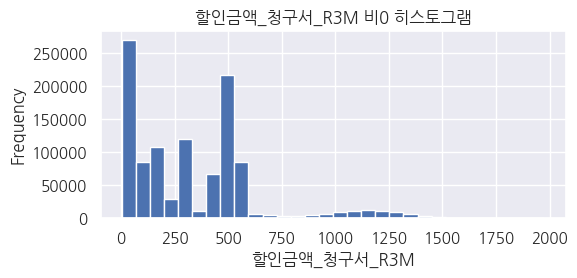

,비0 비율(%)
할인금액_청구서_B0M,29.9554


,할인금액_청구서_B0M 비0 그룹 통계
count,898662.000000
mean,135.272690
median,155.000000
std,103.097125
min,2.000000
max,688.000000


,할인금액_청구서_B0M 비0 비율(%)
Segment,
A,17.283951
B,36.111111
C,38.339995
D,39.732907
E,27.653830


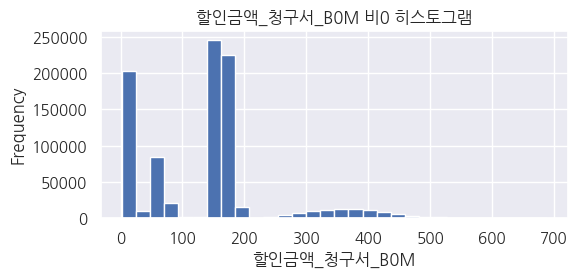

,비0 비율(%)
상환개월수_결제일_R6M,82.4114


,상환개월수_결제일_R6M 비0 그룹 통계
count,2.472342e+06
mean,4.791410e+00
median,6.000000e+00
std,1.736904e+00
min,1.000000e+00
max,6.000000e+00


,상환개월수_결제일_R6M 비0 비율(%)
Segment,
A,98.353909
B,77.777778
C,92.161611
D,91.962880
E,80.082641


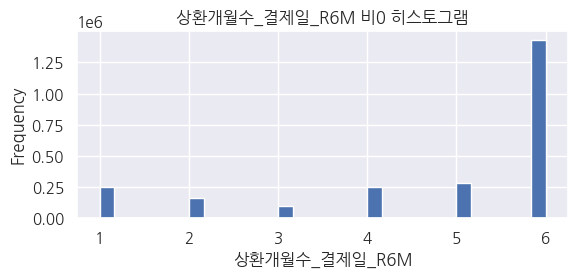

,비0 비율(%)
상환개월수_결제일_R3M,76.164467


,상환개월수_결제일_R3M 비0 그룹 통계
count,2.284934e+06
mean,2.645817e+00
median,3.000000e+00
std,6.873943e-01
min,1.000000e+00
max,3.000000e+00


,상환개월수_결제일_R3M 비0 비율(%)
Segment,
A,97.530864
B,69.444444
C,88.924681
D,88.366519
E,73.152964


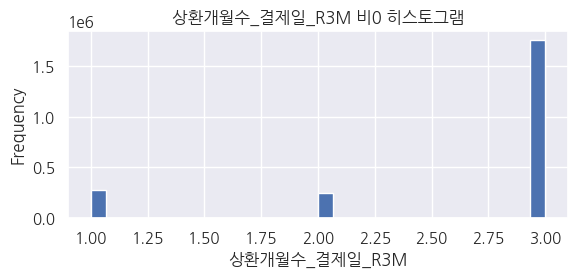

,비0 비율(%)
선결제건수_R6M,9.83


,선결제건수_R6M 비0 그룹 통계
count,294900.000000
mean,3.270814
median,3.000000
std,1.669605
min,1.000000
max,8.000000


,선결제건수_R6M 비0 비율(%)
Segment,
A,21.502058
B,56.944444
C,21.573007
D,18.544161
E,7.473783


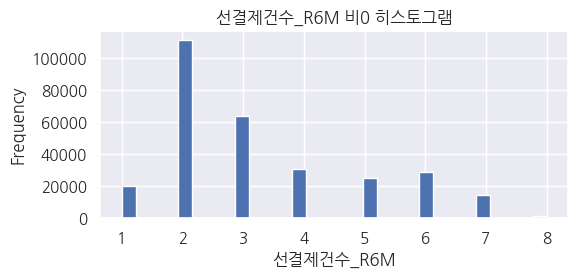

,비0 비율(%)
선결제건수_R3M,7.401233


,선결제건수_R3M 비0 그룹 통계
count,222037.000000
mean,2.244986
median,2.000000
std,0.693205
min,1.000000
max,4.000000


,선결제건수_R3M 비0 비율(%)
Segment,
A,15.226337
B,48.611111
C,16.862607
D,14.417224
E,5.507863


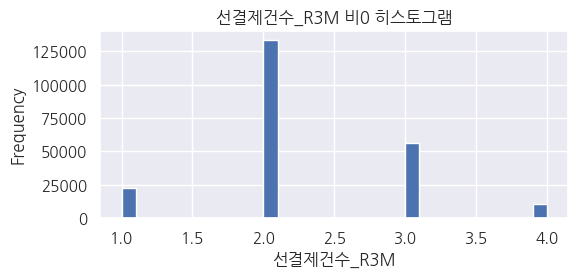

,비0 비율(%)
연체건수_R6M,15.883


,연체건수_R6M 비0 그룹 통계
count,476490.000000
mean,2.779586
median,2.000000
std,1.563134
min,1.000000
max,8.000000


,연체건수_R6M 비0 비율(%)
Segment,
A,16.255144
B,25.000000
C,20.017243
D,19.975833
E,14.801317


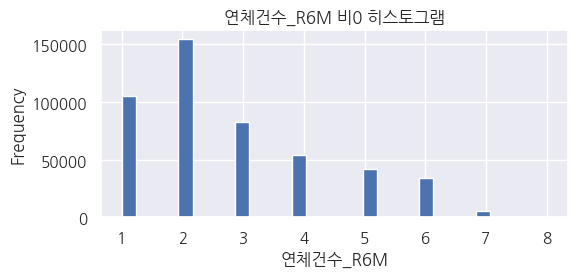

,비0 비율(%)
연체건수_R3M,10.7158


,연체건수_R3M 비0 그룹 통계
count,321474.000000
mean,2.060624
median,2.000000
std,0.739943
min,1.000000
max,4.000000


,연체건수_R3M 비0 비율(%)
Segment,
A,11.111111
B,24.305556
C,14.032448
D,13.974837
E,9.847132


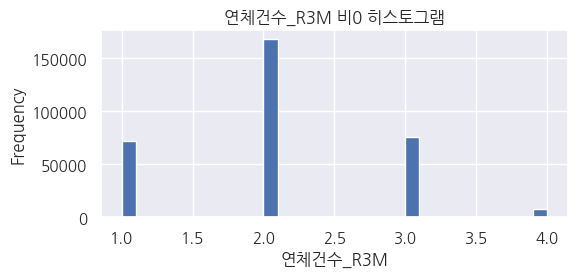

,비0 비율(%)
혜택수혜금액_R3M,43.660433


,혜택수혜금액_R3M 비0 그룹 통계
count,1.309813e+06
mean,2.739833e+02
median,1.500000e+02
std,2.697555e+02
min,1.000000e+00
max,3.754000e+03


,혜택수혜금액_R3M 비0 비율(%)
Segment,
A,90.843621
B,91.666667
C,70.819030
D,64.293241
E,38.118792


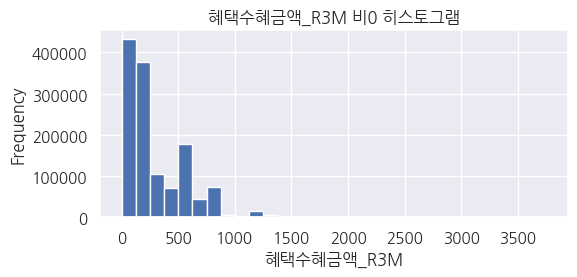

,비0 비율(%)
혜택수혜금액,38.293167


,혜택수혜금액 비0 그룹 통계
count,1.148795e+06
mean,1.030211e+02
median,5.500000e+01
std,8.925581e+01
min,1.000000e+00
max,8.570000e+02


,혜택수혜금액 비0 비율(%)
Segment,
A,89.917695
B,91.666667
C,66.572615
D,58.697408
E,32.701873


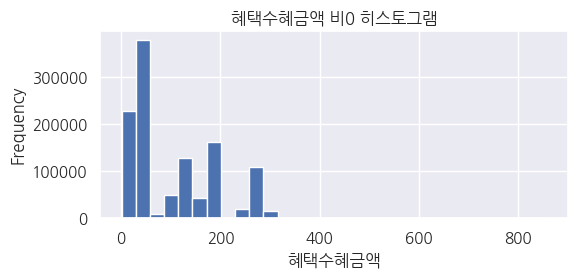

In [20]:
# 분석에서 제외할 컬럼 리스트
exclude_cols = ['ID', 'Segment', '기준년월']

# 0 vs 비0 플래그 대상으로 사용할 수치형 컬럼 리스트
num_cols = [
    col for col in df1.select_dtypes(include='number').columns
    if col not in exclude_cols
]

# 비0 비율 계산 후, 5% 이상 95% 이하인 컬럼만 선별
ratio = {col: (df1[col] != 0).mean() * 100 for col in num_cols}
valid_cols = [col for col, pct in ratio.items() if 5 <= pct <= 95]

# 유효 컬럼 목록 출력
display(pd.DataFrame({'비0 비율(%)': [ratio[c] for c in valid_cols]}, index=valid_cols))

# 유효 컬럼들에 대해 EDA 수행
for orig_col in valid_cols:
    # 비0 플래그 생성
    flag_col = f'{orig_col}_flag'
    df1[flag_col] = (df1[orig_col] != 0).astype(int)

    # 비0 비율 계산 및 출력
    pct_nonzero = ratio[orig_col]
    display(pd.DataFrame({'비0 비율(%)': [pct_nonzero]}, index=[orig_col]))

    # 비0 그룹 통계 요약 출력
    group_stats = df1[df1[flag_col] == 1][orig_col].agg(
        ['count', 'mean', 'median', 'std', 'min', 'max']
    )
    display(group_stats.to_frame(name=f'{orig_col} 비0 그룹 통계'))

    # 세그먼트별 비0 비율 교차표 출력
    cross_tab = pd.crosstab(df1['Segment'], df1[flag_col], normalize='index') * 100
    display(cross_tab[1].to_frame(name=f'{orig_col} 비0 비율(%)'))

    # 비0 값 히스토그램 시각화
    non_zero_values = df1.loc[df1[flag_col] == 1, orig_col]
    plt.figure(figsize=(6,3))
    plt.hist(non_zero_values, bins=30)
    plt.title(f'{orig_col} 비0 히스토그램')
    plt.xlabel(orig_col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [21]:
total = exclude_cols + valid_cols
df1 = df1[total]

In [24]:
valid_cols

['청구금액_B0',
 '청구금액_R3M',
 '청구금액_R6M',
 '포인트_포인트_건별_B0M',
 '포인트_포인트_건별_R3M',
 '포인트_적립포인트_R12M',
 '포인트_적립포인트_R3M',
 '포인트_이용포인트_R12M',
 '포인트_이용포인트_R3M',
 '마일_적립포인트_R3M',
 '할인건수_R3M',
 '할인금액_R3M',
 '할인금액_B0M',
 '할인금액_청구서_R3M',
 '할인금액_청구서_B0M',
 '상환개월수_결제일_R6M',
 '상환개월수_결제일_R3M',
 '선결제건수_R6M',
 '선결제건수_R3M',
 '연체건수_R6M',
 '연체건수_R3M',
 '혜택수혜금액_R3M',
 '혜택수혜금액']

- 대부분의 고객은 청구금액이 작음
- 소수의 고객이 큰 금액을 사용
### 그렇다면 카드 사용량에 따른 등급 분류인가?

🔍 [분석 변수]: 청구금액_B0


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,49514.364198,25669.385371,5854.0,33031.75,45198.0,59310.75,195486.0
B,144.0,47600.666667,28214.180161,8090.0,31008.50,42928.0,58192.50,191903.0
C,127590.0,20001.545098,15544.950886,0.0,8821.25,17344.0,27498.00,210006.0
D,349242.0,10703.868727,9067.197751,0.0,4573.00,8810.0,14521.00,147212.0
E,1922052.0,3022.291375,4435.287793,0.0,0.00,1435.0,4438.00,128119.0


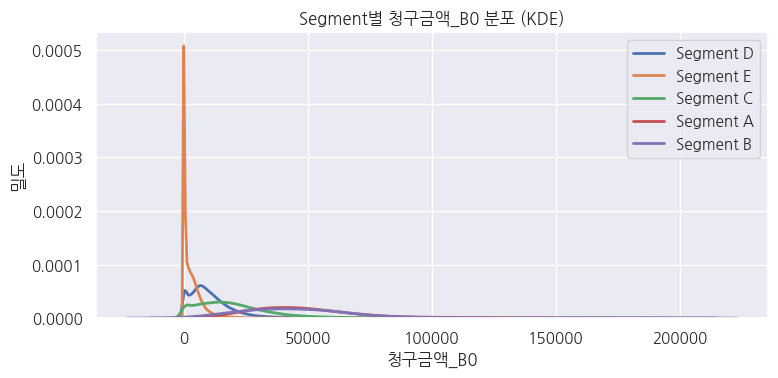

,청구금액_B0 비0 비율(%)
Segment,
A,100.000000
B,100.000000
C,97.043655
D,95.532324
E,72.516196


🔍 [분석 변수]: 청구금액_R3M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,151168.328189,70249.205190,7472.0,106111.0,139468.5,178187.75,508110.0
B,144.0,148207.687500,72992.983418,28996.0,100500.5,140071.0,181274.25,472637.0
C,127590.0,61462.174896,45109.976092,0.0,28489.5,54892.0,84692.50,532261.0
D,349242.0,33112.578759,26644.259585,0.0,15022.0,28006.5,45039.00,391438.0
E,1922052.0,9454.453713,13524.321477,0.0,54.0,4692.0,13995.00,344929.0


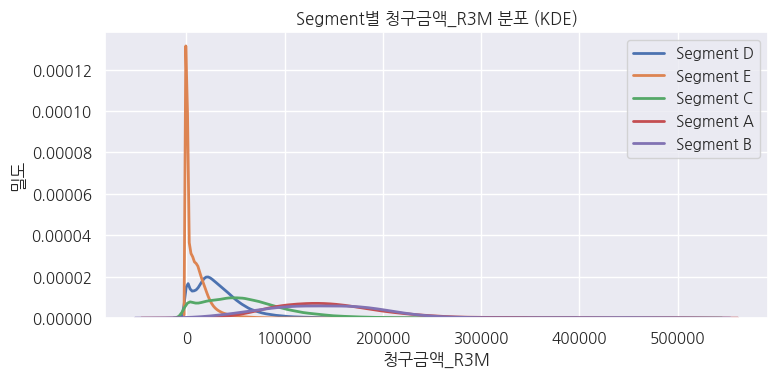

,청구금액_R3M 비0 비율(%)
Segment,
A,100.000000
B,100.000000
C,97.680069
D,96.492690
E,75.969121


🔍 [분석 변수]: 청구금액_R6M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,316939.458848,143058.580107,12056.0,227031.0,294936.0,364904.75,1112355.0
B,144.0,316174.256944,150900.827846,52478.0,221191.5,305692.0,373467.25,944773.0
C,127590.0,128408.240129,92340.265477,0.0,61861.5,115177.0,175631.00,1112355.0
D,349242.0,69963.942264,54680.502580,0.0,33122.0,59813.0,94394.00,1027904.0
E,1922052.0,19778.687382,28105.159733,0.0,560.0,10091.0,28965.00,885054.0


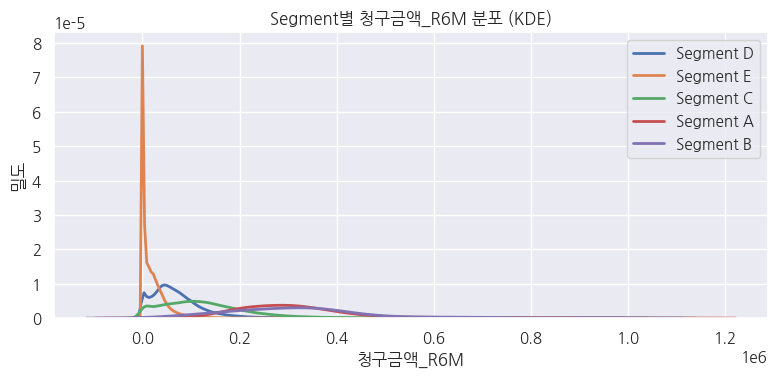

,청구금액_R6M 비0 비율(%)
Segment,
A,100.000000
B,100.000000
C,98.618230
D,97.952423
E,82.096842


🔍 [분석 변수]: 포인트_포인트_건별_B0M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,806.450617,1432.640284,0.0,0.0,0.0,1370.25,5296.0
B,144.0,1005.215278,1618.198853,0.0,0.0,0.0,1799.25,5703.0
C,127590.0,573.756768,1274.448378,0.0,0.0,0.0,0.00,6622.0
D,349242.0,470.561822,1138.679088,0.0,0.0,0.0,0.00,7741.0
E,1922052.0,198.627945,697.762578,-63.0,0.0,0.0,0.00,6758.0


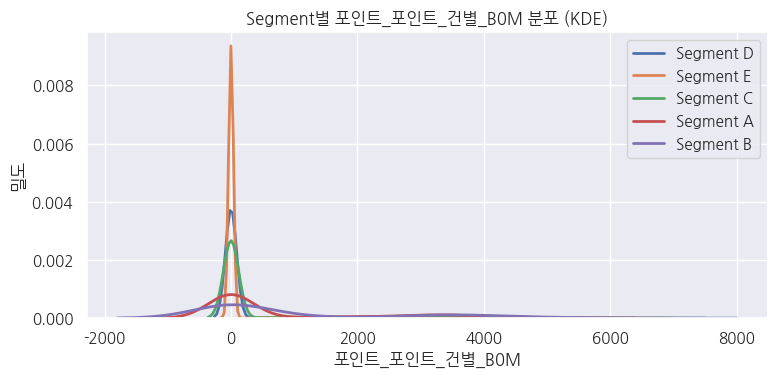

,포인트_포인트_건별_B0M 비0 비율(%)
Segment,
A,26.646091
B,33.333333
C,18.880790
D,16.320775
E,9.275972


🔍 [분석 변수]: 포인트_포인트_건별_R3M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,2322.020576,4210.404605,0.0,0.0,0.0,2910.00,18751.0
B,144.0,2837.687500,4673.910354,0.0,0.0,0.0,4016.75,15490.0
C,127590.0,1660.877341,3743.157176,0.0,0.0,0.0,0.00,24768.0
D,349242.0,1355.037997,3320.512986,-20.0,0.0,0.0,0.00,23286.0
E,1922052.0,559.545157,1995.258629,-136.0,0.0,0.0,0.00,21717.0


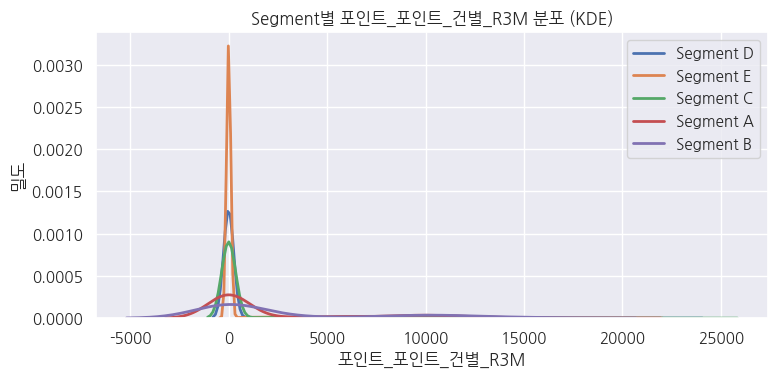

,포인트_포인트_건별_R3M 비0 비율(%)
Segment,
A,26.851852
B,33.333333
C,19.280508
D,16.733955
E,9.946713


🔍 [분석 변수]: 포인트_적립포인트_R12M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,9303.530864,20561.316922,0.0,0.0,0.0,8580.50,181347.0
B,144.0,13768.902778,29662.502860,0.0,0.0,0.0,10952.00,184039.0
C,127590.0,8163.578501,19860.679921,0.0,0.0,0.0,4492.75,282016.0
D,349242.0,6492.180540,16866.117328,0.0,0.0,0.0,2966.00,324302.0
E,1922052.0,2084.889276,8214.290700,0.0,0.0,0.0,0.00,252357.0


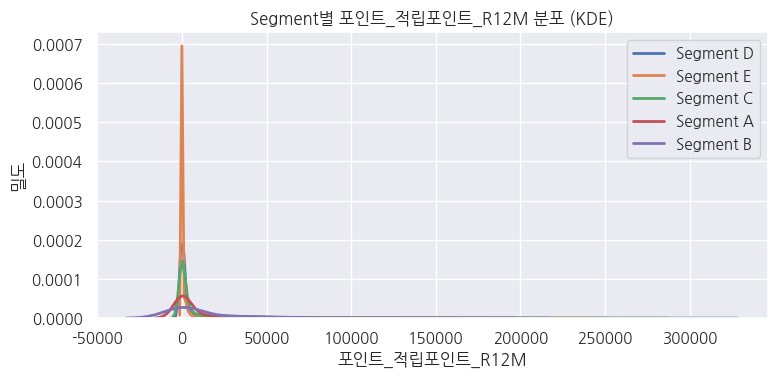

,포인트_적립포인트_R12M 비0 비율(%)
Segment,
A,34.259259
B,38.194444
C,34.591269
D,31.371084
E,19.698218


🔍 [분석 변수]: 포인트_적립포인트_R3M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,2634.699588,5168.460883,0.0,0.0,0.0,3950.25,34580.0
B,144.0,4792.416667,8625.359328,0.0,0.0,1280.0,6812.50,57049.0
C,127590.0,2983.222894,5908.943057,0.0,0.0,0.0,4349.50,76995.0
D,349242.0,2578.174389,5483.667820,-20.0,0.0,0.0,2977.00,69561.0
E,1922052.0,958.112157,3197.868058,-199.0,0.0,0.0,0.00,72443.0


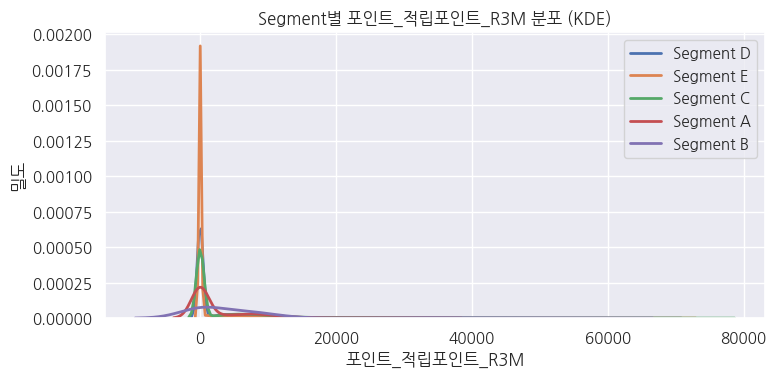

,포인트_적립포인트_R3M 비0 비율(%)
Segment,
A,30.041152
B,52.777778
C,31.557332
D,28.615688
E,14.803242


🔍 [분석 변수]: 포인트_이용포인트_R12M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,19014.758230,59769.346396,0.0,0.0,0.0,9709.75,835029.0
B,144.0,64764.729167,238045.642684,0.0,0.0,6189.5,25327.25,1737161.0
C,127590.0,29266.219139,93070.593424,0.0,0.0,1172.0,13980.75,1737161.0
D,349242.0,24082.708194,82075.523825,0.0,0.0,0.0,9000.00,1737161.0
E,1922052.0,6760.676666,36858.549678,0.0,0.0,0.0,1568.00,1737161.0


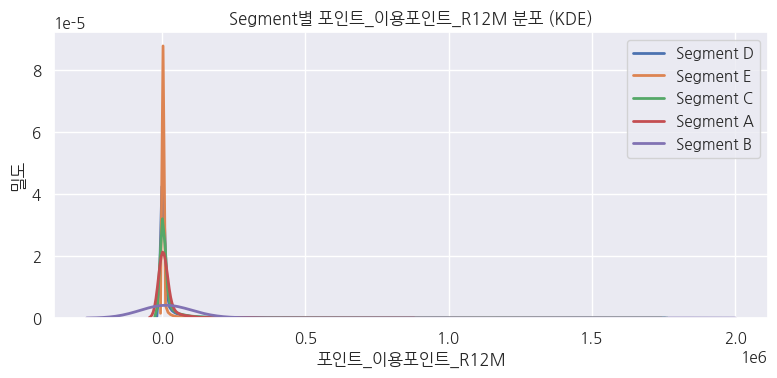

,포인트_이용포인트_R12M 비0 비율(%)
Segment,
A,45.987654
B,65.972222
C,51.448389
D,47.981056
E,28.816390


🔍 [분석 변수]: 포인트_이용포인트_R3M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,3609.936214,8688.115842,0.0,0.0,0.0,3181.50,77413.0
B,144.0,9080.715278,24985.279340,0.0,0.0,3351.5,7211.00,215753.0
C,127590.0,5144.311184,12260.408087,0.0,0.0,0.0,4670.75,229307.0
D,349242.0,4248.117397,10829.867269,0.0,0.0,0.0,3373.00,235303.0
E,1922052.0,1368.394114,5533.097228,-20.0,0.0,0.0,0.00,235914.0


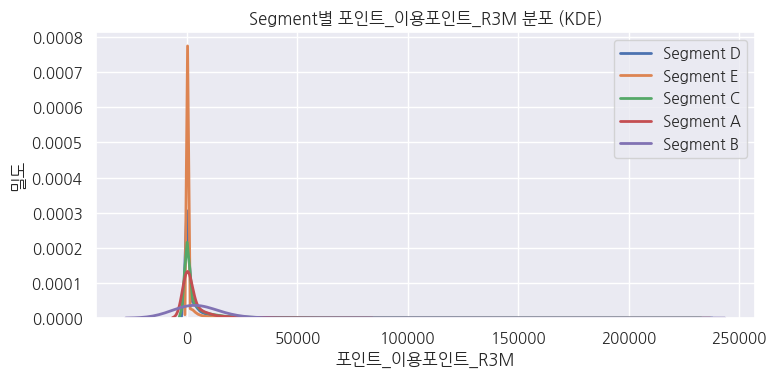

,포인트_이용포인트_R3M 비0 비율(%)
Segment,
A,35.802469
B,62.500000
C,40.378556
D,36.463255
E,17.862056


🔍 [분석 변수]: 마일_적립포인트_R3M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,2915.158436,2573.682067,0.0,0.0,2665.0,4715.25,11374.0
B,144.0,2302.034722,2648.977872,0.0,0.0,781.5,4560.50,8460.0
C,127590.0,831.908277,1663.226659,0.0,0.0,0.0,0.00,12144.0
D,349242.0,340.496684,1023.690216,0.0,0.0,0.0,0.00,12155.0
E,1922052.0,65.235116,426.525619,0.0,0.0,0.0,0.00,10380.0


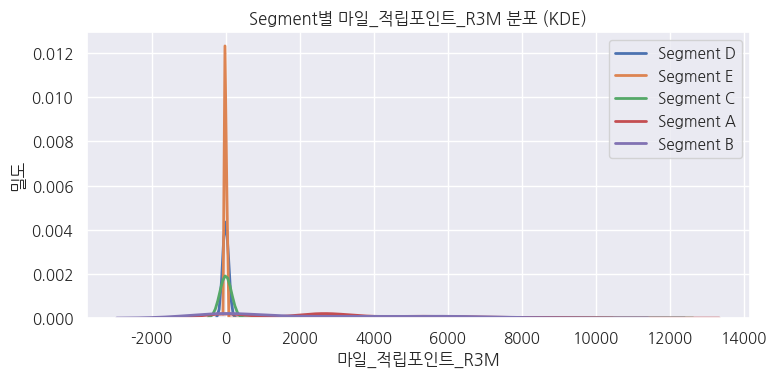

,마일_적립포인트_R3M 비0 비율(%)
Segment,
A,69.547325
B,50.000000
C,23.834156
D,11.488882
E,2.597797


🔍 [분석 변수]: 할인건수_R3M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,0.126543,0.367914,0.0,0.0,0.0,0.0,2.0
B,144.0,0.243056,0.505169,0.0,0.0,0.0,0.0,2.0
C,127590.0,0.376730,0.685382,0.0,0.0,0.0,1.0,4.0
D,349242.0,0.353543,0.654301,0.0,0.0,0.0,1.0,4.0
E,1922052.0,0.080738,0.320477,0.0,0.0,0.0,0.0,3.0


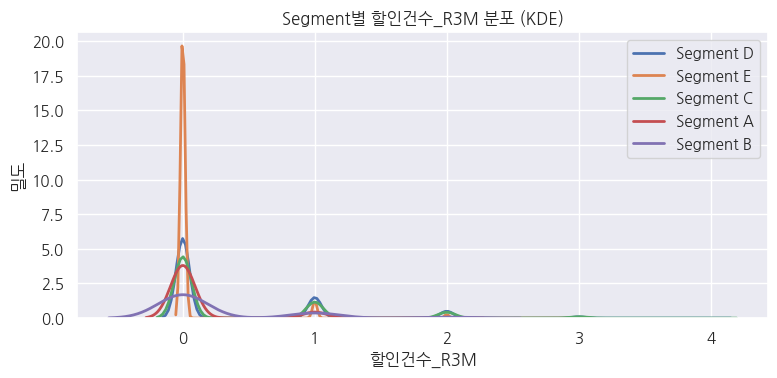

,할인건수_R3M 비0 비율(%)
Segment,
A,11.419753
B,20.833333
C,27.528803
D,26.584718
E,6.743782


🔍 [분석 변수]: 할인금액_R3M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,57.656379,161.476737,0.0,0.0,0.0,14.00,993.0
B,144.0,144.451389,297.644267,0.0,0.0,0.0,97.25,983.0
C,127590.0,163.622886,288.382011,0.0,0.0,0.0,282.00,1358.0
D,349242.0,149.319183,261.237792,0.0,0.0,0.0,316.00,1361.0
E,1922052.0,62.581890,151.695214,0.0,0.0,0.0,11.00,1228.0


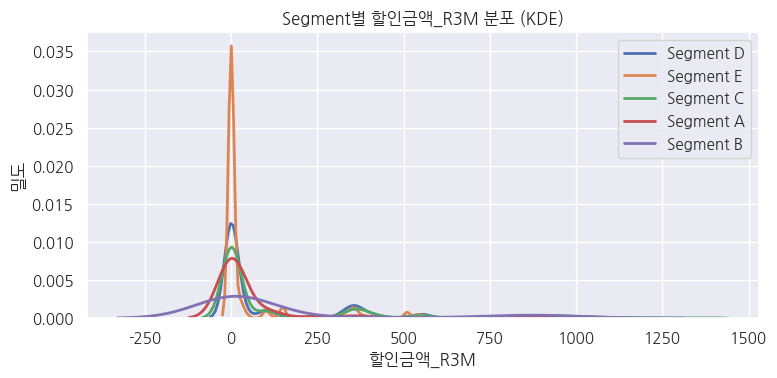

,할인금액_R3M 비0 비율(%)
Segment,
A,29.012346
B,35.416667
C,39.644957
D,39.522165
E,26.119845


🔍 [분석 변수]: 할인금액_B0M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,16.166667,52.285391,0.0,0.0,0.0,0.00,338.0
B,144.0,44.263889,94.116947,0.0,0.0,0.0,20.25,346.0
C,127590.0,52.232526,95.459421,0.0,0.0,0.0,109.00,478.0
D,349242.0,47.688259,86.514862,0.0,0.0,0.0,107.00,480.0
E,1922052.0,19.837797,50.136681,0.0,0.0,0.0,0.00,434.0


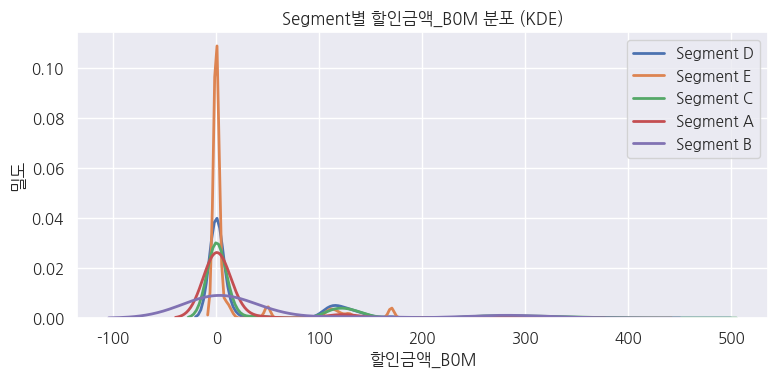

,할인금액_B0M 비0 비율(%)
Segment,
A,16.460905
B,29.861111
C,32.533114
D,33.240847
E,21.969229


🔍 [분석 변수]: 할인금액_청구서_R3M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,91.137860,228.116949,0.0,0.0,0.0,40.0,1450.0
B,144.0,237.583333,417.870132,0.0,0.0,0.0,280.5,1454.0
C,127590.0,242.644706,390.199008,0.0,0.0,0.0,352.0,1976.0
D,349242.0,218.370883,348.209276,0.0,0.0,0.0,393.0,1866.0
E,1922052.0,94.943853,197.017695,0.0,0.0,0.0,27.0,1728.0


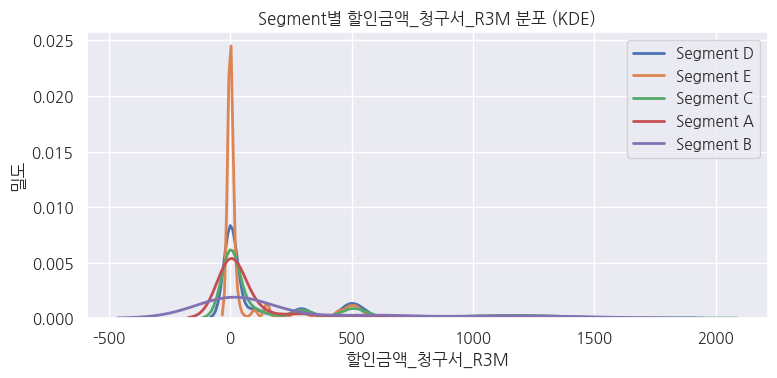

,할인금액_청구서_R3M 비0 비율(%)
Segment,
A,33.333333
B,45.833333
C,48.759307
D,48.681716
E,33.040677


🔍 [분석 변수]: 할인금액_청구서_B0M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,27.254115,79.276870,0.0,0.0,0.0,0.0,527.0
B,144.0,77.743056,139.617447,0.0,0.0,0.0,70.0,490.0
C,127590.0,80.845458,133.004229,0.0,0.0,0.0,160.0,688.0
D,349242.0,73.331421,118.881517,0.0,0.0,0.0,158.0,653.0
E,1922052.0,31.918846,68.149731,0.0,0.0,0.0,9.0,576.0


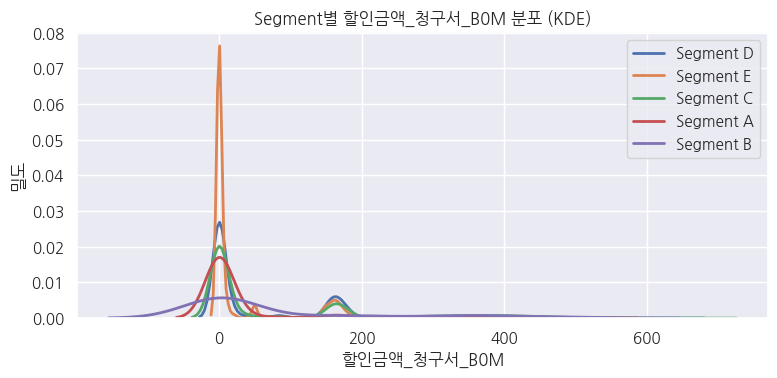

,할인금액_청구서_B0M 비0 비율(%)
Segment,
A,17.283951
B,36.111111
C,38.339995
D,39.732907
E,27.653830


🔍 [분석 변수]: 상환개월수_결제일_R6M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,5.197531,1.434486,0.0,5.0,6.0,6.0,6.0
B,144.0,3.270833,2.481311,0.0,1.0,3.0,6.0,6.0
C,127590.0,4.732824,1.973333,0.0,4.0,6.0,6.0,6.0
D,349242.0,4.724618,1.990481,0.0,4.0,6.0,6.0,6.0
E,1922052.0,3.760744,2.467118,0.0,1.0,5.0,6.0,6.0


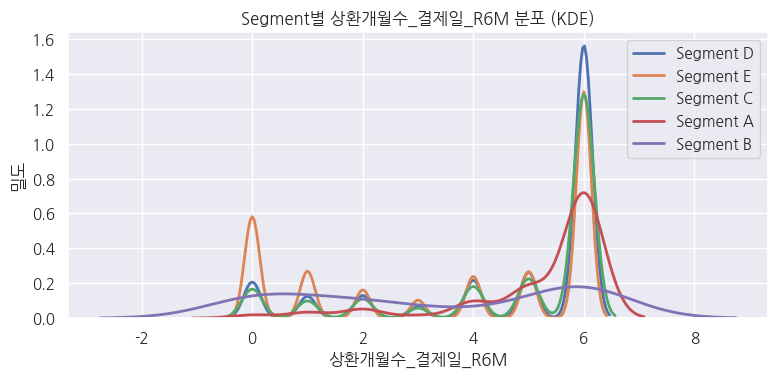

,상환개월수_결제일_R6M 비0 비율(%)
Segment,
A,98.353909
B,77.777778
C,92.161611
D,91.962880
E,80.082641


🔍 [분석 변수]: 상환개월수_결제일_R3M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,2.633745,0.746853,0.0,3.0,3.0,3.0,3.0
B,144.0,1.652778,1.323903,0.0,0.0,2.0,3.0,3.0
C,127590.0,2.386300,1.043618,0.0,2.0,3.0,3.0,3.0
D,349242.0,2.383579,1.055129,0.0,2.0,3.0,3.0,3.0
E,1922052.0,1.926258,1.310548,0.0,0.0,3.0,3.0,3.0


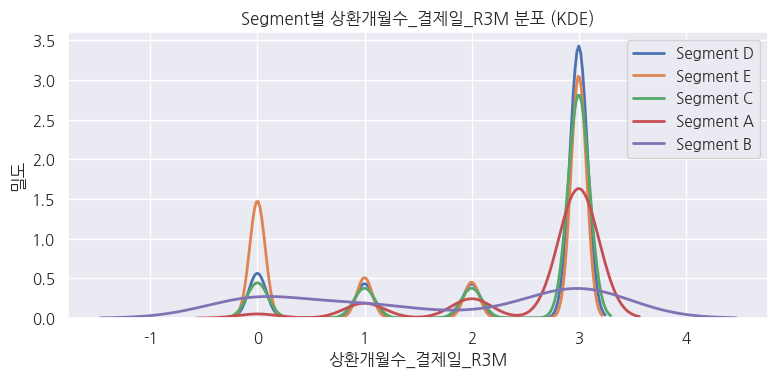

,상환개월수_결제일_R3M 비0 비율(%)
Segment,
A,97.530864
B,69.444444
C,88.924681
D,88.366519
E,73.152964


🔍 [분석 변수]: 선결제건수_R6M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,0.632716,1.348562,0.0,0.0,0.0,0.0,6.0
B,144.0,2.604167,2.756350,0.0,0.0,2.0,6.0,8.0
C,127590.0,0.773807,1.681667,0.0,0.0,0.0,0.0,8.0
D,349242.0,0.648141,1.551590,0.0,0.0,0.0,0.0,8.0
E,1922052.0,0.232416,0.927601,0.0,0.0,0.0,0.0,8.0


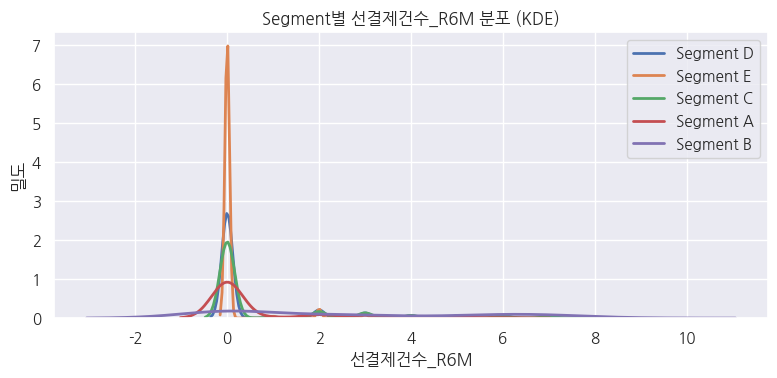

,선결제건수_R6M 비0 비율(%)
Segment,
A,21.502058
B,56.944444
C,21.573007
D,18.544161
E,7.473783


🔍 [분석 변수]: 선결제건수_R3M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,0.322016,0.795332,0.0,0.0,0.0,0.0,3.0
B,144.0,1.381944,1.519093,0.0,0.0,0.0,3.0,4.0
C,127590.0,0.399357,0.934042,0.0,0.0,0.0,0.0,4.0
D,349242.0,0.336285,0.861522,0.0,0.0,0.0,0.0,4.0
E,1922052.0,0.119985,0.521692,0.0,0.0,0.0,0.0,4.0


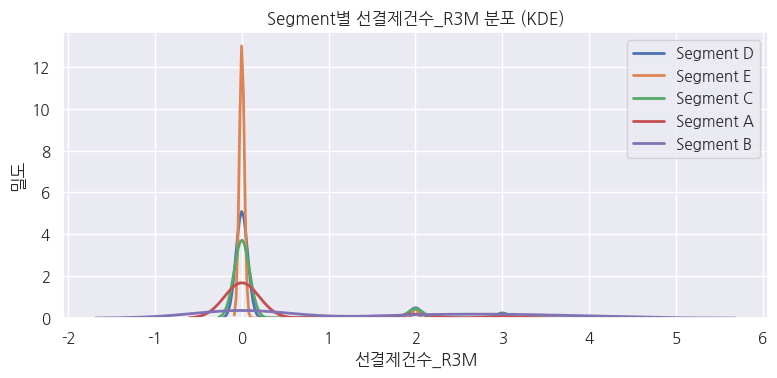

,선결제건수_R3M 비0 비율(%)
Segment,
A,15.226337
B,48.611111
C,16.862607
D,14.417224
E,5.507863


🔍 [분석 변수]: 연체건수_R6M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,0.423868,1.149650,0.0,0.0,0.0,0.0,6.0
B,144.0,0.812500,1.621399,0.0,0.0,0.0,0.5,7.0
C,127590.0,0.596136,1.393901,0.0,0.0,0.0,0.0,7.0
D,349242.0,0.597314,1.405504,0.0,0.0,0.0,0.0,8.0
E,1922052.0,0.401181,1.128220,0.0,0.0,0.0,0.0,8.0


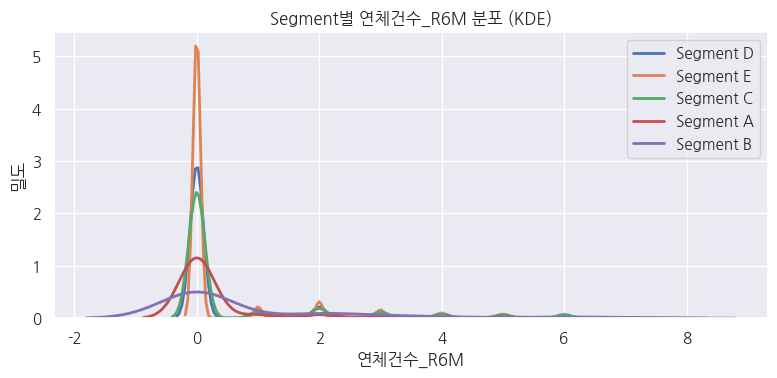

,연체건수_R6M 비0 비율(%)
Segment,
A,16.255144
B,25.000000
C,20.017243
D,19.975833
E,14.801317


🔍 [분석 변수]: 연체건수_R3M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,0.216049,0.659736,0.0,0.0,0.0,0.0,4.0
B,144.0,0.506944,0.967995,0.0,0.0,0.0,0.0,4.0
C,127590.0,0.300353,0.793463,0.0,0.0,0.0,0.0,4.0
D,349242.0,0.301673,0.799777,0.0,0.0,0.0,0.0,4.0
E,1922052.0,0.199810,0.647009,0.0,0.0,0.0,0.0,4.0


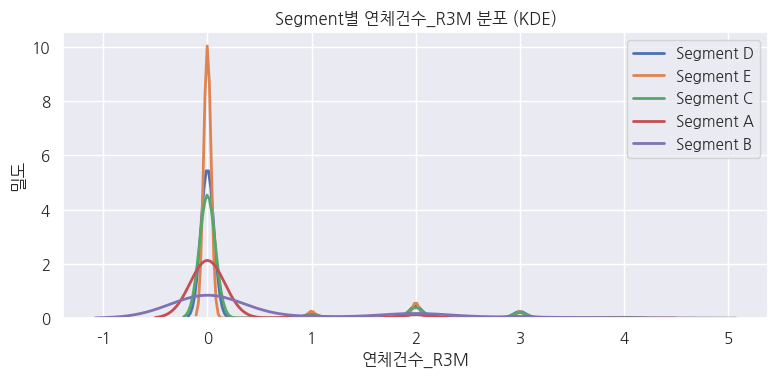

,연체건수_R3M 비0 비율(%)
Segment,
A,11.111111
B,24.305556
C,14.032448
D,13.974837
E,9.847132


🔍 [분석 변수]: 혜택수혜금액_R3M


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,733.882716,541.417760,0.0,157.75,841.5,1198.00,3327.0
B,144.0,648.451389,508.295683,0.0,133.00,829.0,1101.25,1527.0
C,127590.0,361.270954,397.249885,0.0,0.00,155.0,732.00,3754.0
D,349242.0,236.203601,296.445592,0.0,0.00,131.0,400.00,3253.0
E,1922052.0,82.135866,167.747908,0.0,0.00,0.0,118.00,3092.0


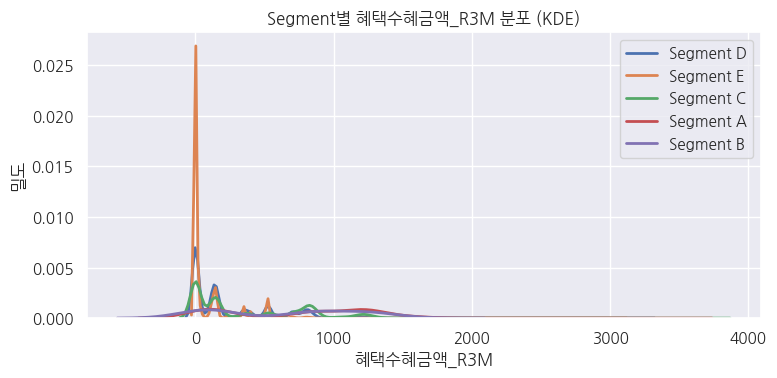

,혜택수혜금액_R3M 비0 비율(%)
Segment,
A,90.843621
B,91.666667
C,70.819030
D,64.293241
E,38.118792


🔍 [분석 변수]: 혜택수혜금액


,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
A,972.0,228.886831,174.370102,0.0,56.0,272.0,295.00,572.0
B,144.0,202.930556,164.594167,0.0,53.0,274.5,293.25,548.0
C,127590.0,117.239666,126.479930,0.0,0.0,54.0,264.00,857.0
D,349242.0,78.967381,98.577059,0.0,0.0,48.0,122.00,811.0
E,1922052.0,27.034641,56.906617,0.0,0.0,0.0,9.00,798.0


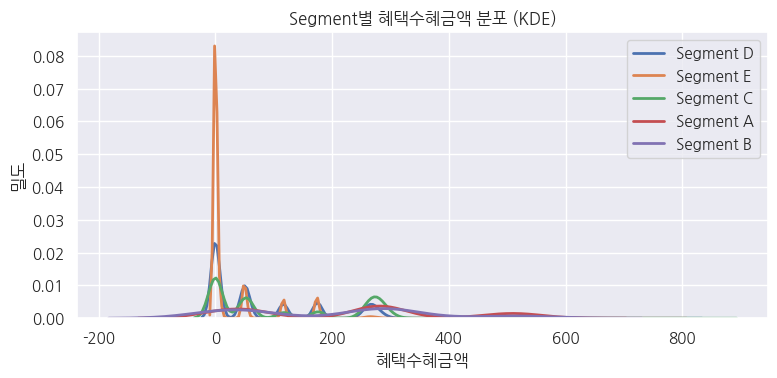

,혜택수혜금액 비0 비율(%)
Segment,
A,89.917695
B,91.666667
C,66.572615
D,58.697408
E,32.701873


In [23]:
# 분석 제외 컬럼
exclude_cols = ['ID', '기준년월']

# 수치형 컬럼 목록
numeric_cols = [
    col for col in df1.select_dtypes(include='number').columns
    if col not in exclude_cols
]

for col in numeric_cols:
    print(f"🔍 [분석 변수]: {col}")

    # ▶ Segment별 통계 요약
    stats = df1.groupby('Segment')[col].describe()
    display(stats)

    # ▶ Segment별 KDE 플롯
    plt.figure(figsize=(8, 4))
    for seg in df1['Segment'].unique():
        sns.kdeplot(df1[df1['Segment'] == seg][col], label=f"Segment {seg}", linewidth=2)
    plt.title(f'Segment별 {col} 분포 (KDE)')
    plt.xlabel(col)
    plt.ylabel('밀도')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ▶ 0/비0 비율 (희소 변수 탐지)
    zero_ratio = (df1[col] == 0).mean() * 100
    if 5 <= (100 - zero_ratio) <= 95:
        flag_col = f'{col}_flag'
        df1[flag_col] = (df1[col] != 0).astype(int)
        cross_tab = pd.crosstab(df1['Segment'], df1[flag_col], normalize='index') * 100
        display(cross_tab[1].to_frame(name=f'{col} 비0 비율(%)'))


### 잔액정보

In [25]:
# train, test데이터 불러오기
balance_train = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/train/2018_train_잔액정보.parquet')
balance_test = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/test/2018_test_잔액정보.parquet')

#세그먼트 가져오기
segment_train = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/train/2018_train_회원정보.parquet')
segment_test = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/test/2018_test_회원정보.parquet')

# 데이터 합치기
balance = pd.concat([balance_train, balance_test])
balance.reset_index(inplace=True, drop=True)

segment = pd.concat([segment_train, segment_test])
segment.reset_index(inplace=True, drop=True)

# 데이터 파일에 Segment 컬럼 매칭시키기
df2 = balance.merge(
    segment[["ID", "기준년월", "Segment"]],
    on=["ID", "기준년월"],
    how="left"
)
df2


,기준년월,ID,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,...,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,Segment
0,201807,TRAIN_000000,998,962,22971,0,0,0,1084,547,...,2440,0,0,0,572,0,17008,0,0,D
1,201807,TRAIN_000001,2565,2390,0,0,0,0,4090,2553,...,2677,0,2830,0,2736,0,0,0,0,E
2,201807,TRAIN_000002,5312,5113,21531,6795,0,0,5006,8778,...,9118,0,8870,0,4429,0,43351,0,0,C
3,201807,TRAIN_000003,730,5025,26284,0,0,0,487,5607,...,884,0,0,0,5097,0,30697,0,0,D
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,21,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,201812,TEST_99995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2999996,201812,TEST_99996,191,0,0,0,0,0,260,0,...,137,0,0,0,0,0,0,0,0,NaN
2999997,201812,TEST_99997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2999998,201812,TEST_99998,17916,2786,0,0,0,0,16911,2081,...,18108,240,0,0,1830,0,0,0,0,NaN


In [27]:
valid_cols

['잔액_일시불_B0M',
 '잔액_할부_B0M',
 '잔액_카드론_B0M',
 '월중평잔_일시불_B0M',
 '월중평잔_할부_B0M',
 '월중평잔_CA_B0M',
 '잔액_현금서비스_B1M',
 '잔액_현금서비스_B2M',
 '잔액_카드론_B1M',
 '잔액_카드론_B2M',
 '잔액_카드론_B3M',
 '잔액_카드론_B4M',
 '잔액_카드론_B5M',
 '잔액_할부_B1M',
 '잔액_할부_B2M',
 '잔액_일시불_B1M',
 '잔액_일시불_B2M',
 '연체일수_B1M',
 '연체일수_B2M',
 '최종연체회차',
 'RV_평균잔액_R12M',
 'RV_최대잔액_R12M',
 '잔액_할부_유이자_B0M',
 '잔액_할부_무이자_B0M',
 '월중평잔',
 '월중평잔_일시불',
 '월중평잔_RV일시불',
 '월중평잔_할부',
 '월중평잔_CA',
 '월중평잔_카드론',
 '평잔_3M',
 '평잔_일시불_3M',
 '평잔_일시불_해외_3M',
 '평잔_RV일시불_3M',
 '평잔_할부_3M',
 '평잔_CA_3M',
 '평잔_카드론_3M',
 '평잔_6M',
 '평잔_일시불_6M',
 '평잔_일시불_해외_6M',
 '평잔_RV일시불_6M',
 '평잔_할부_6M',
 '평잔_CA_6M',
 '평잔_카드론_6M']

In [26]:
# 분석에서 제외할 컬럼 리스트
exclude_cols = ['ID', 'Segment', '기준년월']

# 0 vs 비0 플래그 대상으로 사용할 수치형 컬럼 리스트
num_cols = [
    col for col in df2.select_dtypes(include='number').columns
    if col not in exclude_cols
]

# 비0 비율 계산 후, 5% 이상 95% 이하인 컬럼만 선별
ratio = {col: (df2[col] != 0).mean() * 100 for col in num_cols}
valid_cols = [col for col, pct in ratio.items() if 5 <= pct <= 95]

# 유효 컬럼 목록 출력
display(pd.DataFrame({'비0 비율(%)': [ratio[c] for c in valid_cols]}, index=valid_cols))

# 유효 컬럼들에 대해 EDA 수행
for orig_col in valid_cols:
    # 비0 플래그 생성
    flag_col = f'{orig_col}_flag'
    df2[flag_col] = (df2[orig_col] != 0).astype(int)

    # 비0 비율 계산 및 출력
    pct_nonzero = ratio[orig_col]
    display(pd.DataFrame({'비0 비율(%)': [pct_nonzero]}, index=[orig_col]))

    # 비0 그룹 통계 요약 출력
    group_stats = df2[df2[flag_col] == 1][orig_col].agg(
        ['count', 'mean', 'median', 'std', 'min', 'max']
    )
    display(group_stats.to_frame(name=f'{orig_col} 비0 그룹 통계'))

    # 세그먼트별 비0 비율 교차표 출력
    cross_tab = pd.crosstab(df2['Segment'], df2[flag_col], normalize='index') * 100
    display(cross_tab[1].to_frame(name=f'{orig_col} 비0 비율(%)'))

    # 비0 값 히스토그램 시각화
    non_zero_values = df2.loc[df2[flag_col] == 1, orig_col]
    plt.figure(figsize=(6,3))
    plt.hist(non_zero_values, bins=30)
    plt.title(f'{orig_col} 비0 히스토그램')
    plt.xlabel(orig_col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [28]:
# 분석 제외 컬럼
exclude_cols = ['ID', '기준년월']

# 수치형 컬럼 목록
numeric_cols = [
    col for col in df2.select_dtypes(include='number').columns
    if col not in exclude_cols
]

for col in numeric_cols:
    print(f"🔍 [분석 변수]: {col}")

    # ▶ Segment별 통계 요약
    stats = df2.groupby('Segment')[col].describe()
    display(stats)

    # ▶ Segment별 KDE 플롯
    plt.figure(figsize=(8, 4))
    for seg in df2['Segment'].unique():
        sns.kdeplot(df2[df2['Segment'] == seg][col], label=f"Segment {seg}", linewidth=2)
    plt.title(f'Segment별 {col} 분포 (KDE)')
    plt.xlabel(col)
    plt.ylabel('밀도')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ▶ 0/비0 비율 (희소 변수 탐지)
    zero_ratio = (df2[col] == 0).mean() * 100
    if 5 <= (100 - zero_ratio) <= 95:
        flag_col = f'{col}_flag'
        df2[flag_col] = (df2[col] != 0).astype(int)
        cross_tab = pd.crosstab(df2['Segment'], df2[flag_col], normalize='index') * 100
        display(cross_tab[1].to_frame(name=f'{col} 비0 비율(%)'))


Output hidden; open in https://colab.research.google.com to view.

# 청구입금 정보 가설

### 가설 1) 청구금액이 클수록 우량 고객일 가능성이 높다.

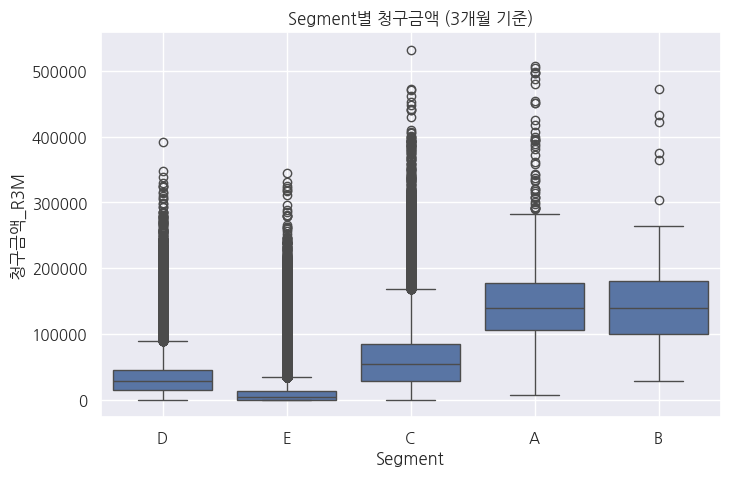

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Segment', y='청구금액_R3M', data=df1)
plt.title('Segment별 청구금액 (3개월 기준)')
plt.ylabel('청구금액_R3M')
plt.grid(True)
plt.show()

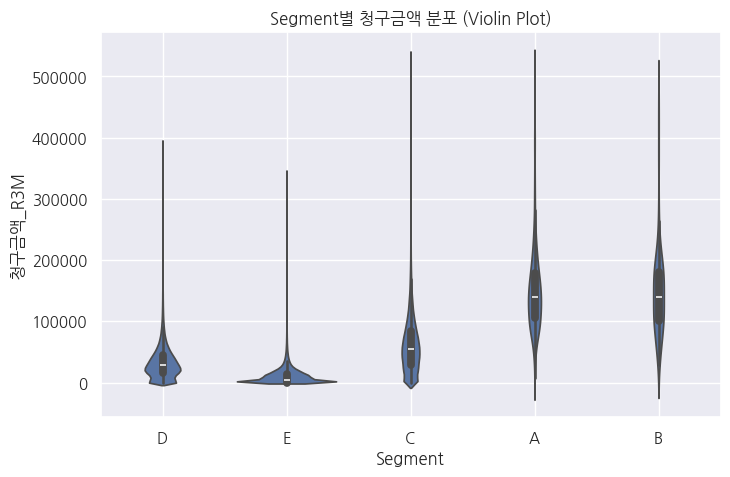

In [44]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Segment', y='청구금액_R3M', data=df1)
plt.title('Segment별 청구금액 분포 (Violin Plot)')
plt.ylabel('청구금액_R3M')
plt.grid(True)
plt.show()

- 대체로 맞음
- E는 청구금액이 매우 낮으므로 저소비/저소득층 가능성있음

### 가설 2) 마일리지를 적립하는 고객은 고소득/우수고객일 가능성이 높다.

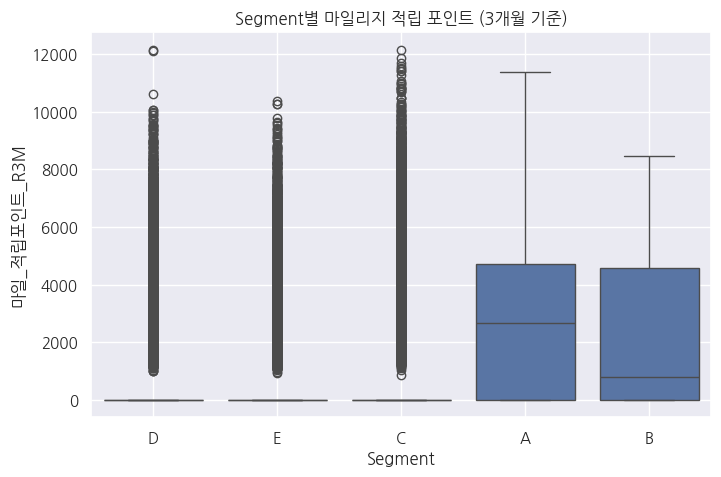

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Segment', y='마일_적립포인트_R3M', data=df1)
plt.title('Segment별 마일리지 적립 포인트 (3개월 기준)')
plt.ylabel('마일_적립포인트_R3M')
plt.grid(True)
plt.show()


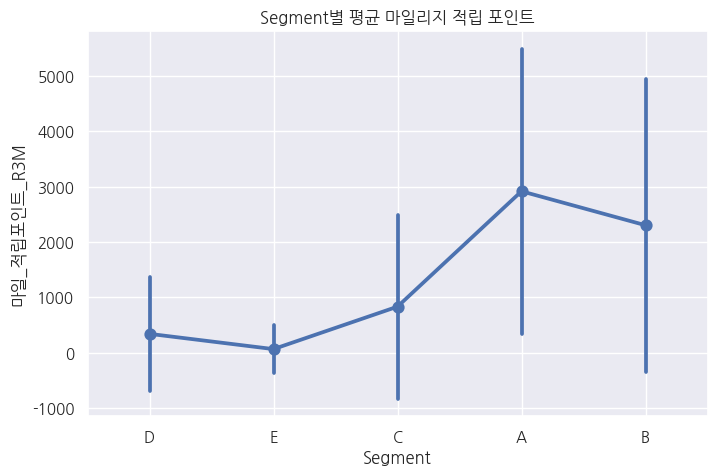

In [45]:
plt.figure(figsize=(8, 5))
sns.pointplot(x='Segment', y='마일_적립포인트_R3M', data=df1, estimator='mean', errorbar='sd')
plt.title('Segment별 평균 마일리지 적립 포인트')
plt.ylabel('마일_적립포인트_R3M')
plt.grid(True)
plt.show()

- A/B는 소비 규모가 크고 마일리지 혜택을 활용하는 고객층이라고 할 수 있음.
-  C는 적립하긴하지만 고액 적립 고객은 적음.
- 나머지는 소비량이 적거나 마일리지 혜택에 관심이 없는 고객층인 것 같음.

### 가설 3) 혜택 수혜 금액이 많을수록 혜택 중심의 우수 고객일 수 있다.

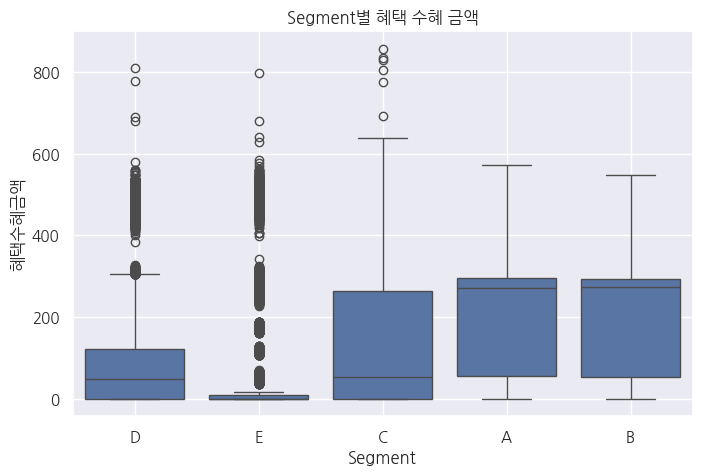

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Segment', y='혜택수혜금액', data=df1)
plt.title('Segment별 혜택 수혜 금액')
plt.ylabel('혜택수혜금액')
plt.grid(True)
plt.show()


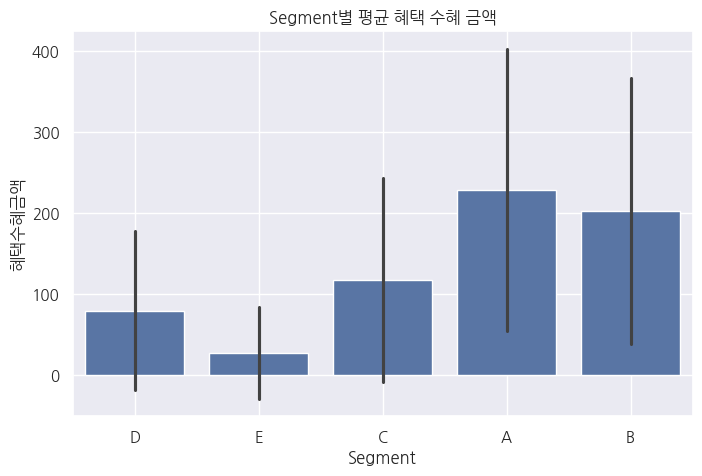

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='혜택수혜금액', data=df1, estimator='mean', errorbar='sd')
plt.title('Segment별 평균 혜택 수혜 금액')
plt.ylabel('혜택수혜금액')
plt.grid(True)
plt.show()

- A,B,C는 혜택 중심의 우수 고객층임

# 잔액정보 가설

### 가설 1) 총 잔액이 낮을수록 상환을 잘하는 고객일 것이다.

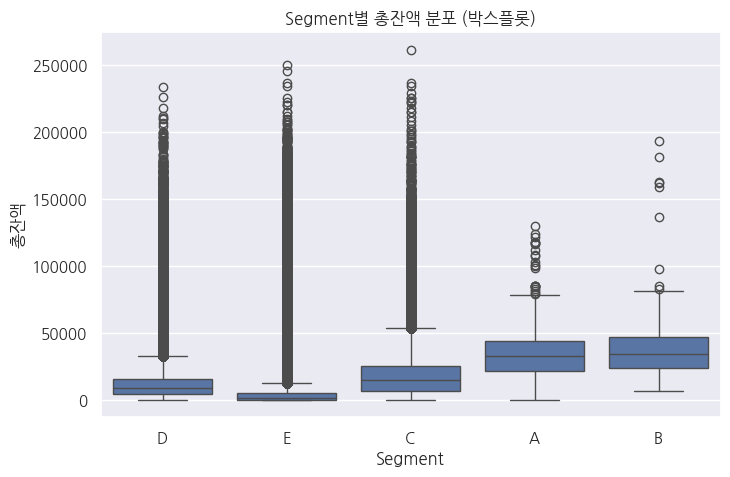

In [29]:
df2['총잔액'] = df2[['잔액_일시불_B0M', '잔액_할부_B0M', '잔액_카드론_B0M']].sum(axis=1)

plt.figure(figsize=(8, 5))
sns.boxplot(x='Segment', y='총잔액', data=df2)
plt.title('Segment별 총잔액 분포 (박스플롯)')
plt.ylabel('총잔액')
plt.show()

### 가설 2) 일시불 비율이 높을수록 A, B에 있을 가능성이 높다.

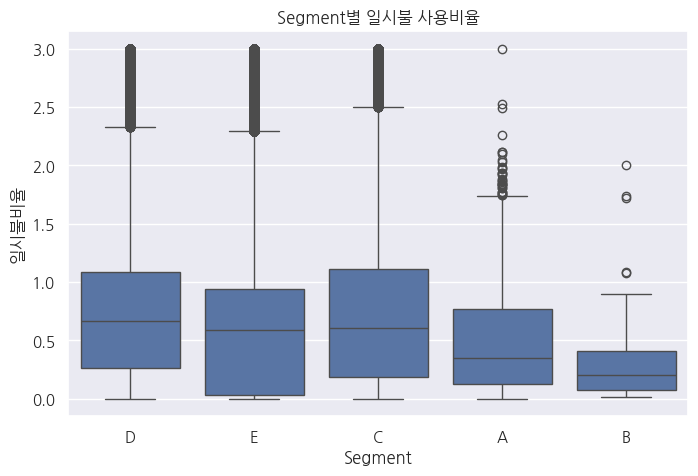

In [34]:
df2['일시불비율'] = df2['평잔_일시불_6M'] / (df2['평잔_6M'] + 1e-6)
df2['일시불비율'] = df2['일시불비율'].clip(upper=3)  # 비율 3 이상은 자르기


plt.figure(figsize=(8, 5))
sns.boxplot(x='Segment', y='일시불비율', data=df2)
plt.title('Segment별 일시불 사용비율')
plt.ylabel('일시불비율')
plt.show()


- 오히려 c, d에 일시불 중심 고객이 많음.

-> 가설 반박됨.

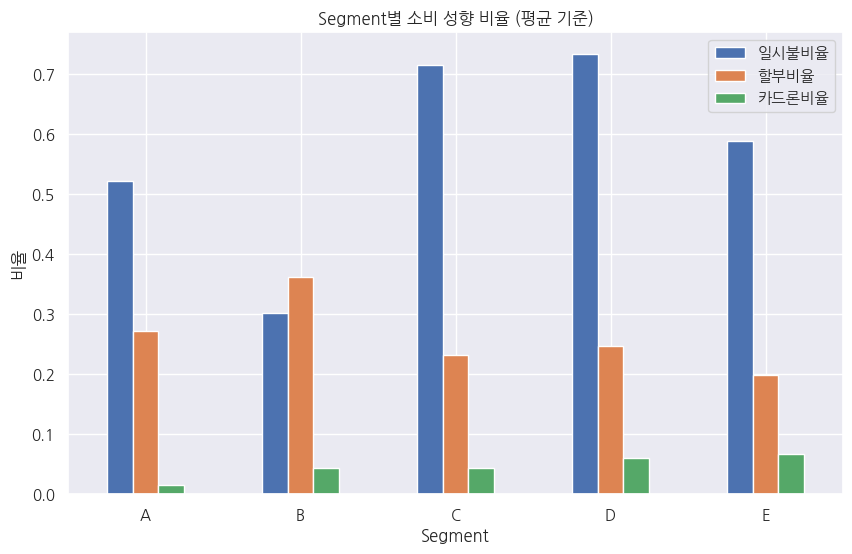

In [38]:
# 비율 계산
df2['일시불비율'] = df2['평잔_일시불_6M'] / (df2['평잔_6M'] + 1e-6)
df2['할부비율'] = df2['평잔_할부_6M'] / (df2['평잔_6M'] + 1e-6)
df2['카드론비율'] = df2['평잔_카드론_6M'] / (df2['평잔_6M'] + 1e-6)

# 극단값 잘라내기
df2['일시불비율'] = df2['일시불비율'].clip(upper=3)
df2['할부비율'] = df2['할부비율'].clip(upper=3)
df2['카드론비율'] = df2['카드론비율'].clip(upper=3)

# 세그먼트별 평균 계산
avg_ratios = df2.groupby('Segment')[['일시불비율', '할부비율', '카드론비율']].mean()

# 시각화
avg_ratios.plot(kind='bar', figsize=(10,6))
plt.title('Segment별 소비 성향 비율 (평균 기준)')
plt.ylabel('비율')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

- 세그먼트별 소비성향을 봤을때 A는 균형잡힌 소비, 신용 안정성 높음, 우량 고객일 가능성이 있음.
- B는 할부 중심 소비가 높으며 혜택에 민감함 실속형일 가능성이 있음.
- C는 일시불 중심소비자로 신용 좋은 일반 or 우수 고객일 가능성있음.
- D, E는 소비가 강하며, 특히  E는 카드론 비율이 가장 높음.

### 가설 3) 연체일수가 있는 고객은 낮은 세그먼트일 가능성이 높다

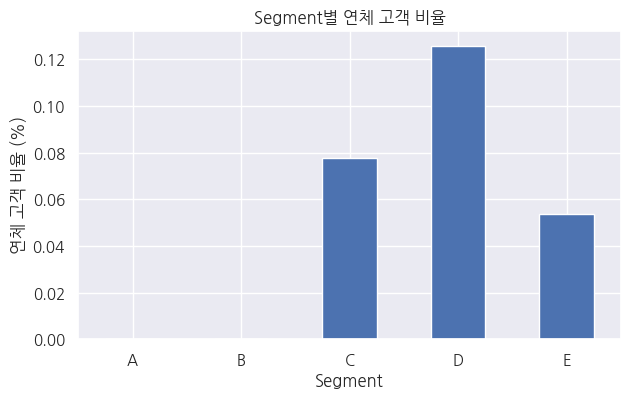

In [33]:
df2['연체_flag'] = ((df2['연체일수_B1M'] > 0) | (df2['연체일수_B2M'] > 0)).astype(int)

cross_tab = pd.crosstab(df2['Segment'], df2['연체_flag'], normalize='index') * 100

cross_tab[1].plot(kind='bar', figsize=(7,4), legend=False)
plt.ylabel('연체 고객 비율 (%)')
plt.title('Segment별 연체 고객 비율')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

- 가설에 대체로 맞으며 d가 연체비율 가장 높음.
- A, B는 연체 거의 없음 -> 우량/신용 관리 고객